In [1]:
%matplotlib notebook
from matplotlib.pyplot import *

from transfer_learning.fingerprint import FingerprintResnet
from transfer_learning.data_processing import CropData, GrayScaleData
from transfer_learning.cutouts import FullImageCutout
from transfer_learning.similarity import tSNE, Jaccard, Distance
from transfer_learning.transfer_learning import TransferLearning
from transfer_learning.transfer_learning_display import TransferLearningDisplay
import pickle

# Full width 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
processing_dict = pickle.load(open('../data/hubble_acs.pck', 'rb'))

In [3]:
to_process = []
for x in processing_dict[:10]:
    x['filename'] = x['filename'].replace('/Users/crjones/christmas/hubble/ACSimages/data/', 'http://18.218.192.161:4123/ACSimages/')
    to_process.append(x)

In [4]:
fingerprint_model = FingerprintResnet()

Using TensorFlow backend.


In [5]:
basic_cutout = FullImageCutout(output_size=224)

# Added Gray Scale as some were 3 channel gray scale
data_processing = [
            [CropData(), GrayScaleData()],
        ]

In [6]:
tl = TransferLearning(basic_cutout, data_processing, fingerprint_model)
tl.calculate_stream(to_process)

/Users/crjones/miniconda3/envs/tlapi/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
N/A% (0 of 1) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--/Users/crjones/miniconda3/envs/tlapi/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
N/A% (0 of 1) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--/Users/crjones/miniconda3/envs/tlapi/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
N/A% (0 of 1) |                          | Elapsed Time: 0:00:00 ETA

In [7]:
similarity = tSNE(display_type='hexbin')

In [8]:
tld = TransferLearningDisplay(similarity)

<IPython.core.display.Javascript object>


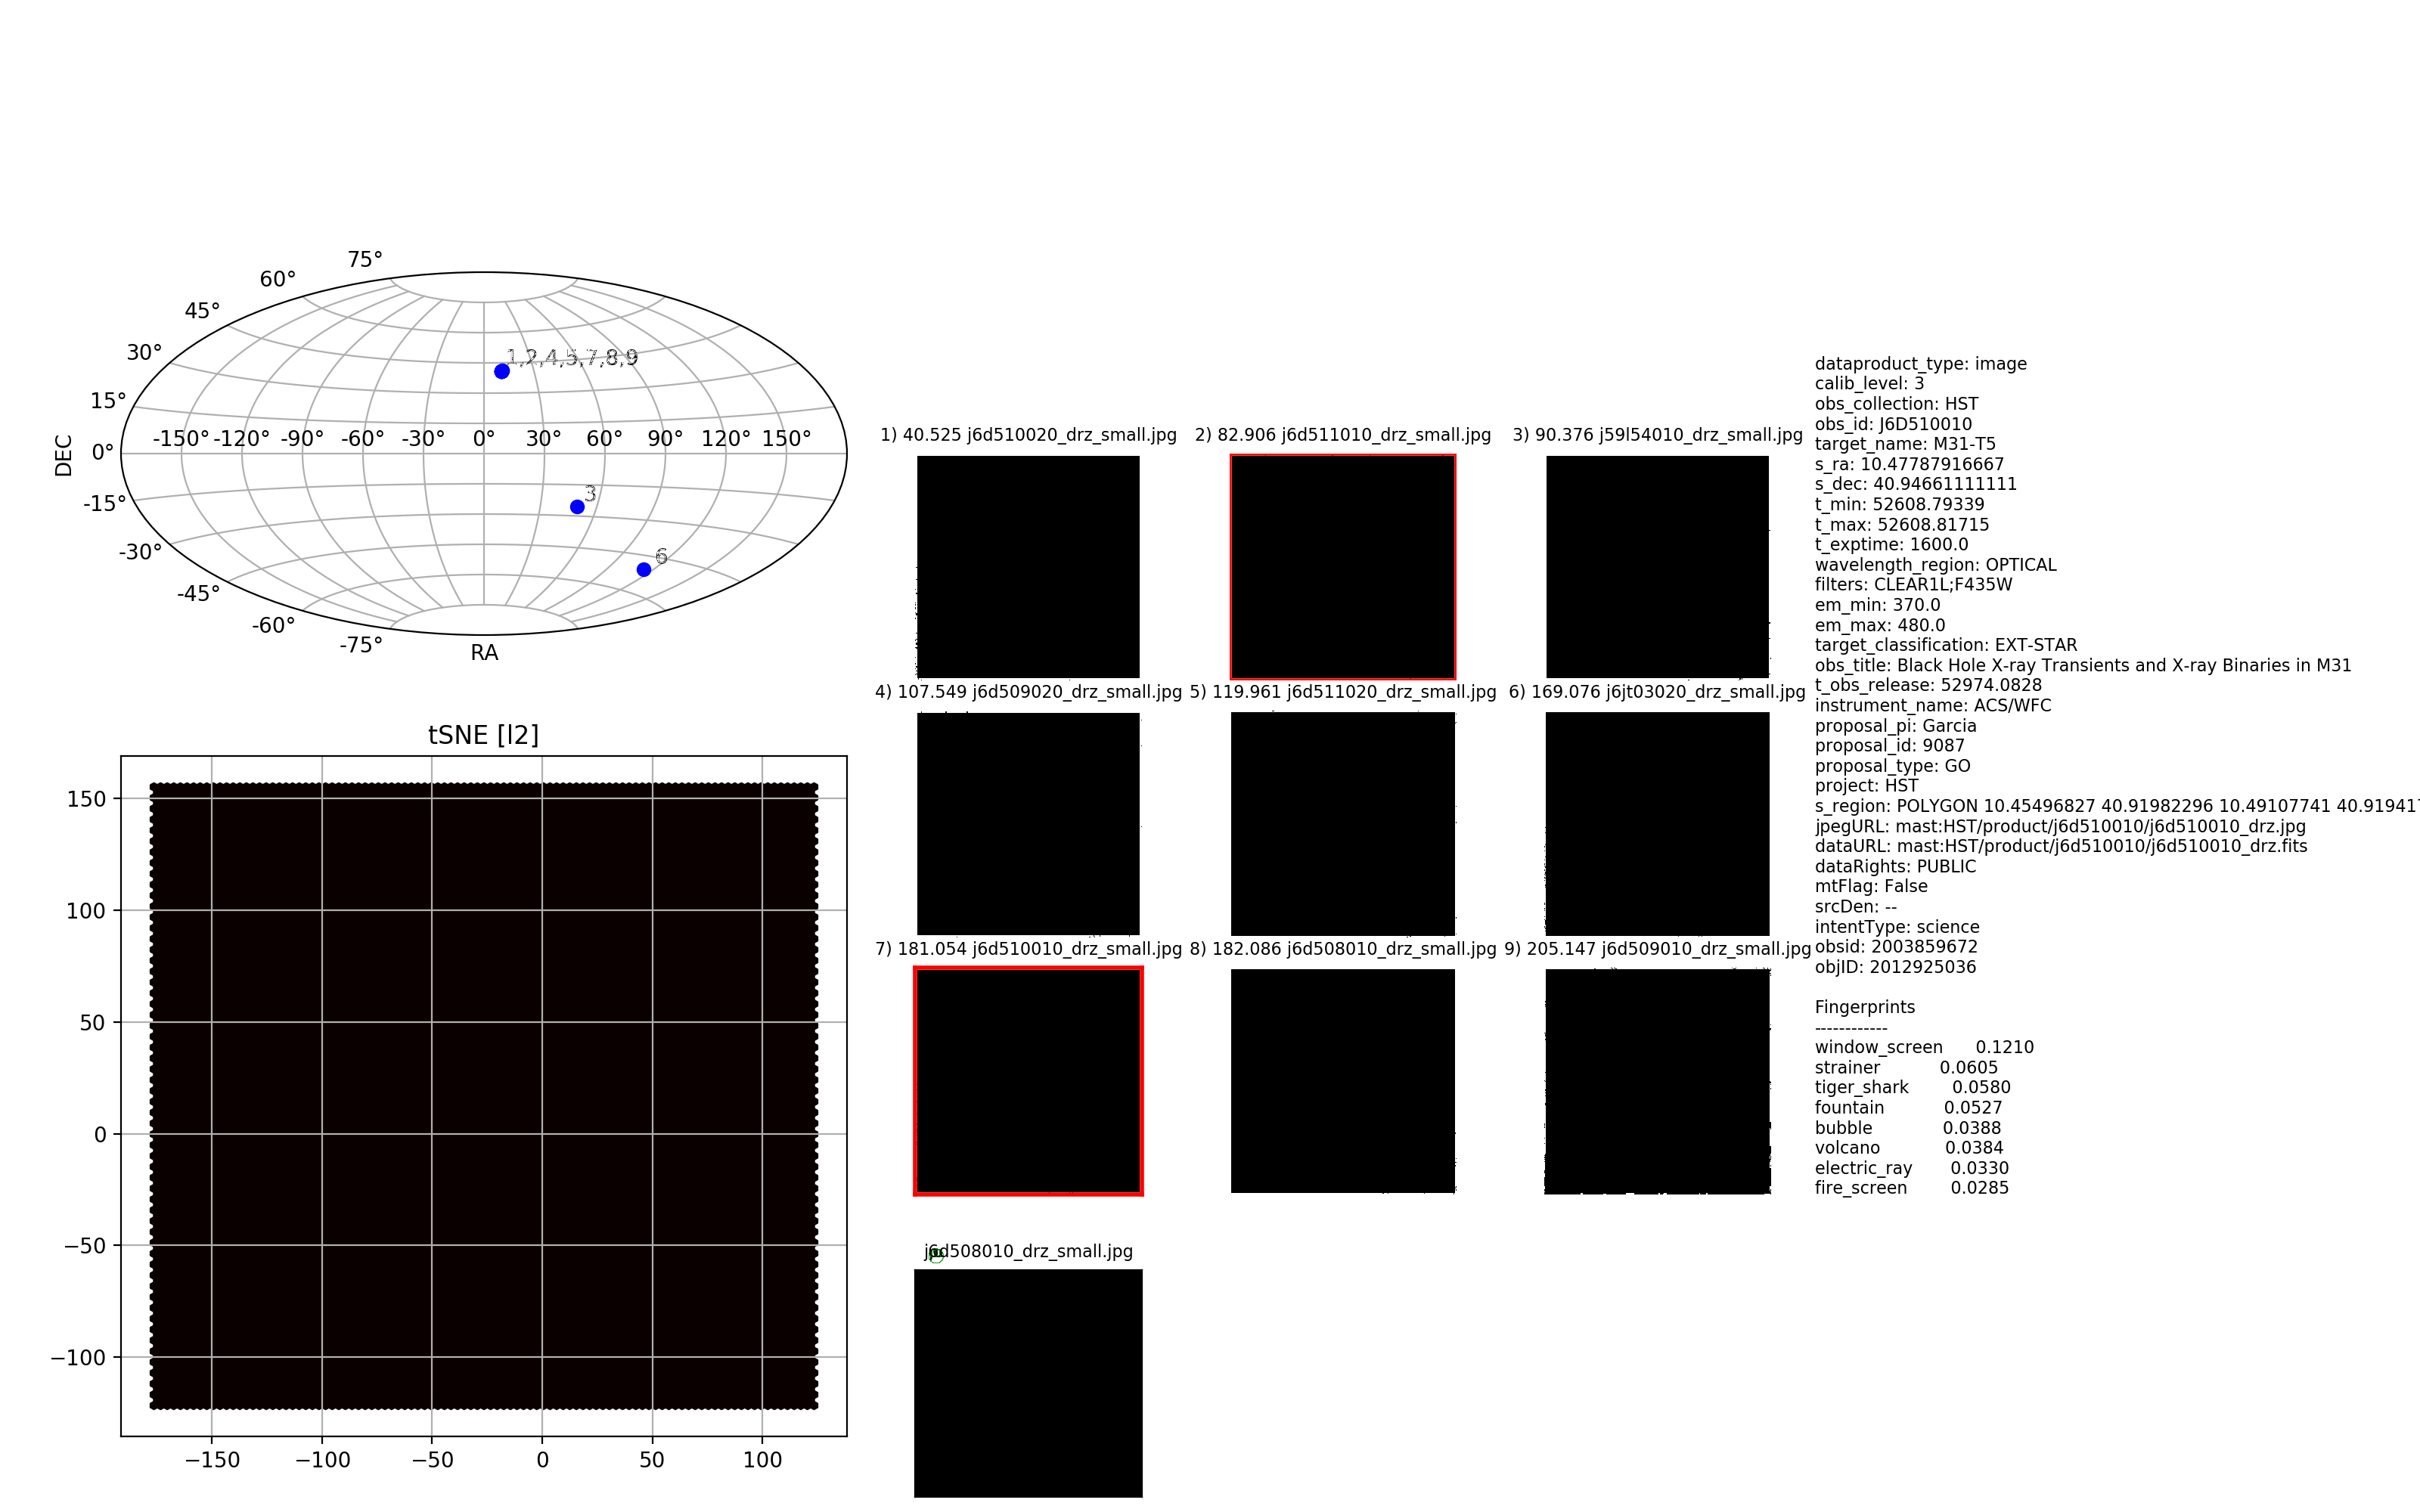

/Users/crjones/miniconda3/envs/tlapi/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [9]:
tld.show(tl.fingerprints)